In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# **Exploratory Data Analysis (EDA)**

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


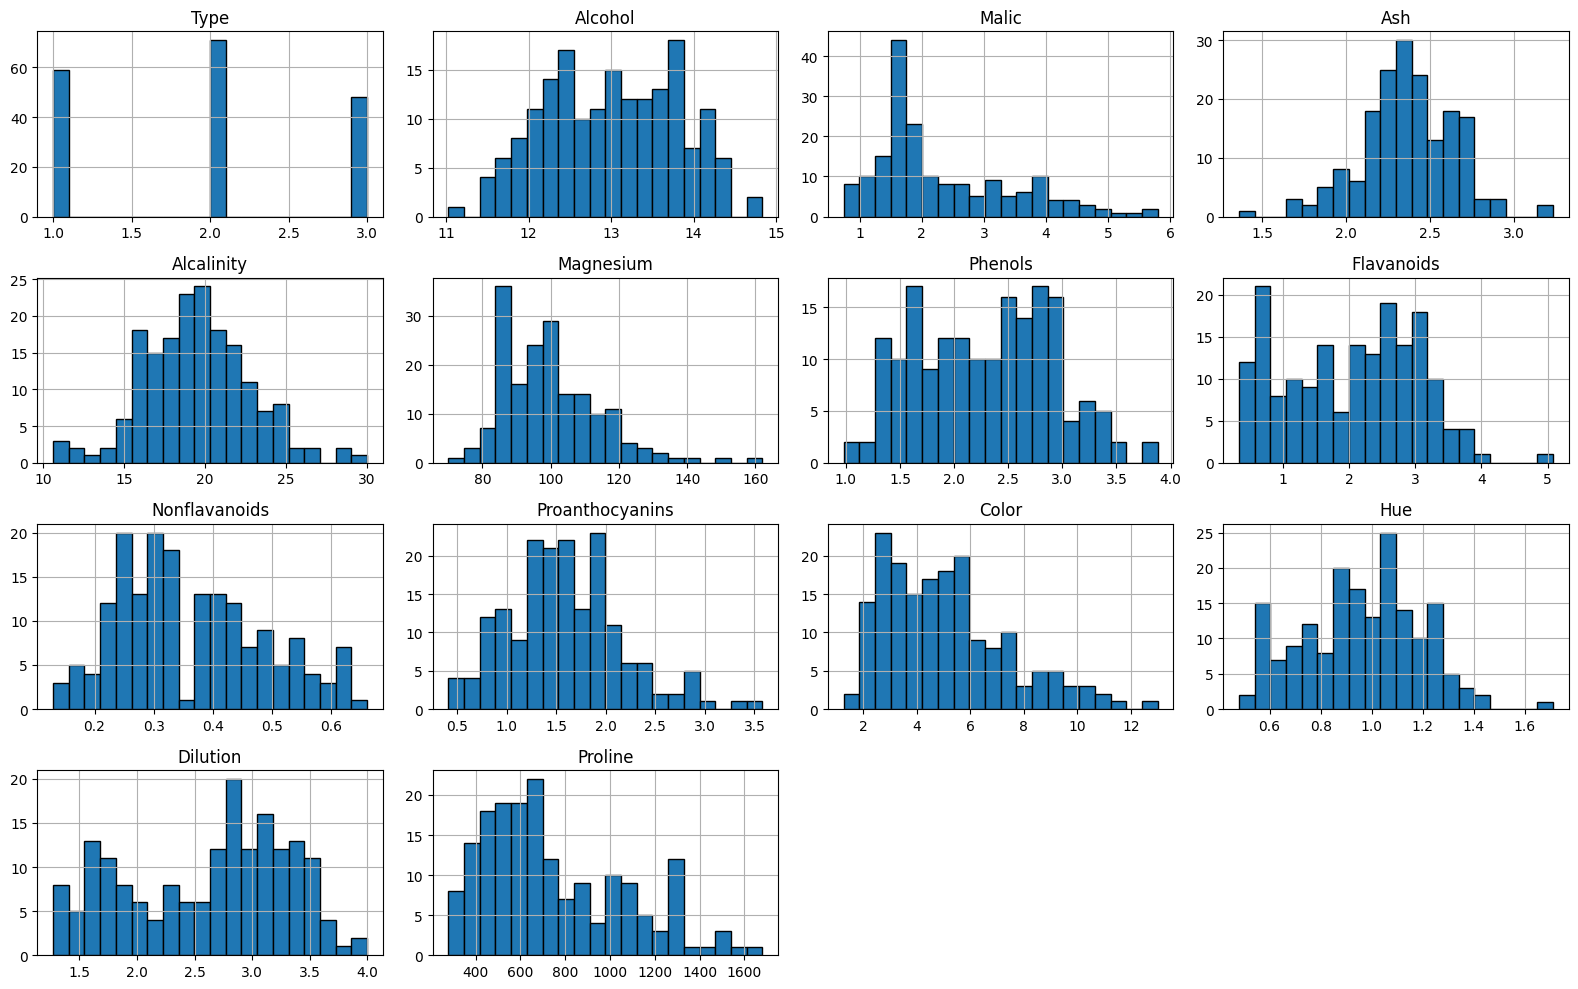

In [10]:
# Histograms for feature distribution
df.hist(bins=20, figsize=(16, 10), edgecolor='black')
plt.tight_layout()
plt.show()

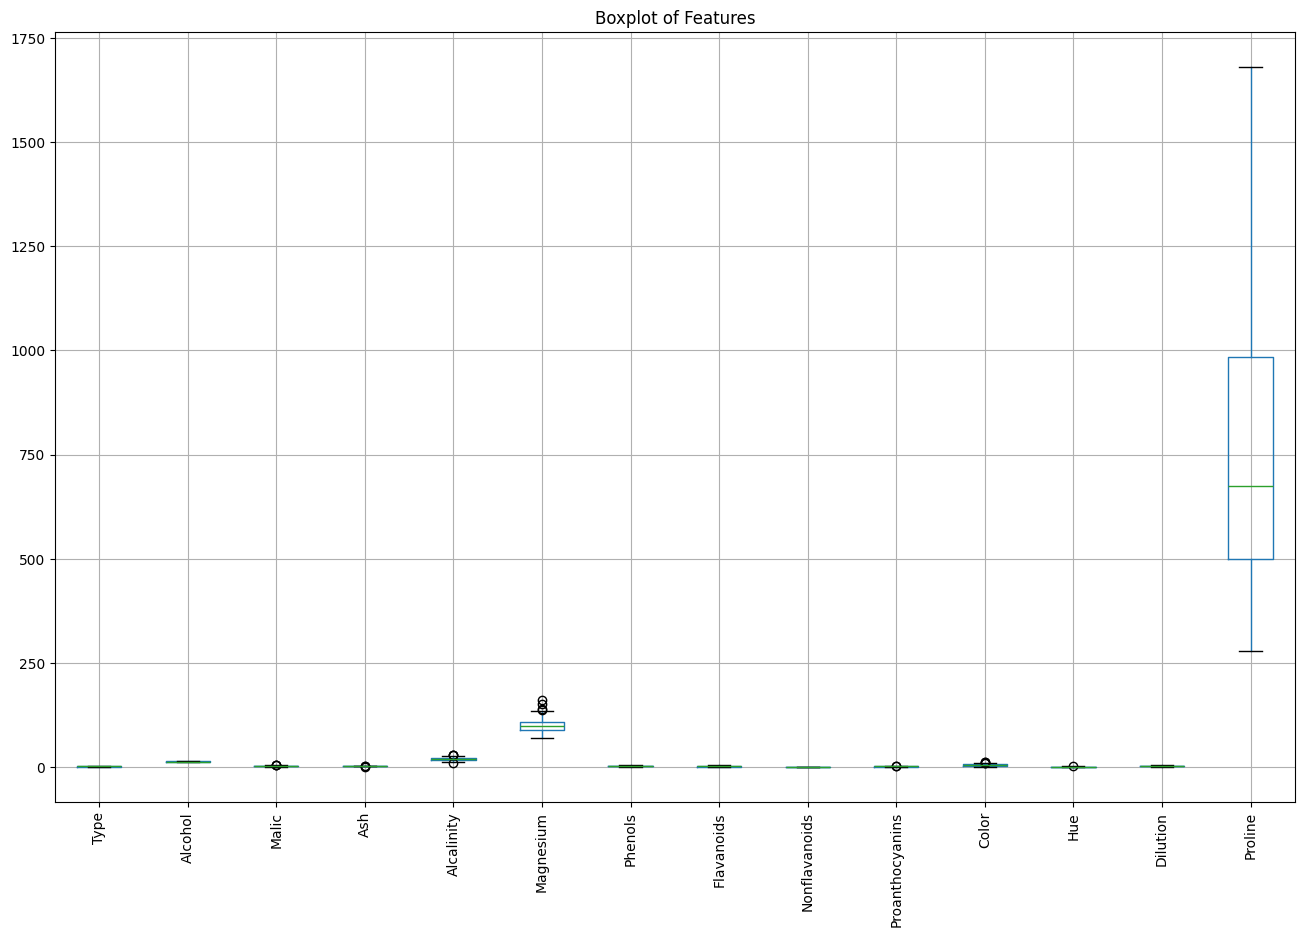

In [11]:
# Box plots to detect outliers
plt.figure(figsize=(16, 10))
df.boxplot(rot=90)
plt.title("Boxplot of Features")
plt.show()

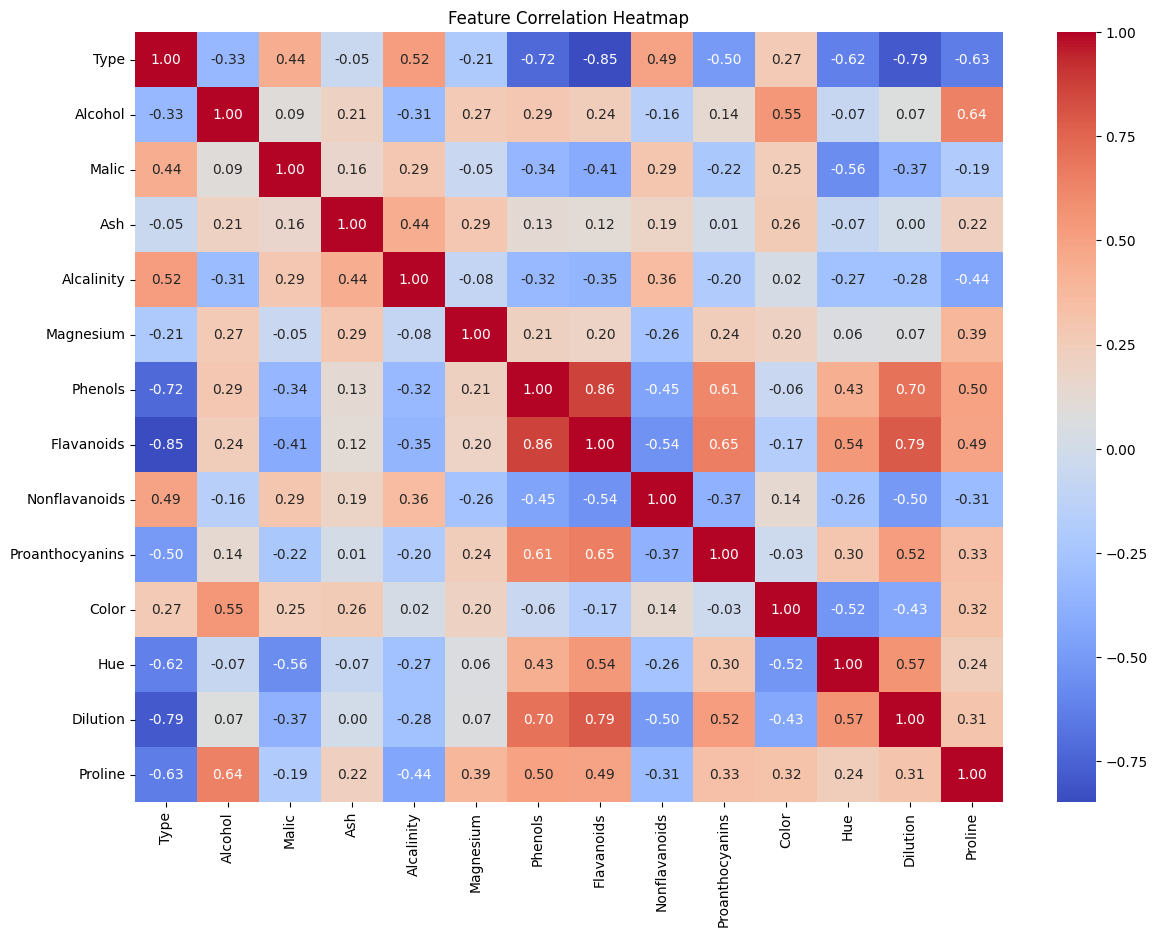

In [12]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# **Dimensionality Reduction with PCA**

In [13]:
# Standardize the data (excluding label column if present)
X = df.drop('Customer_Segment', axis=1) if 'Customer_Segment' in df.columns else df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

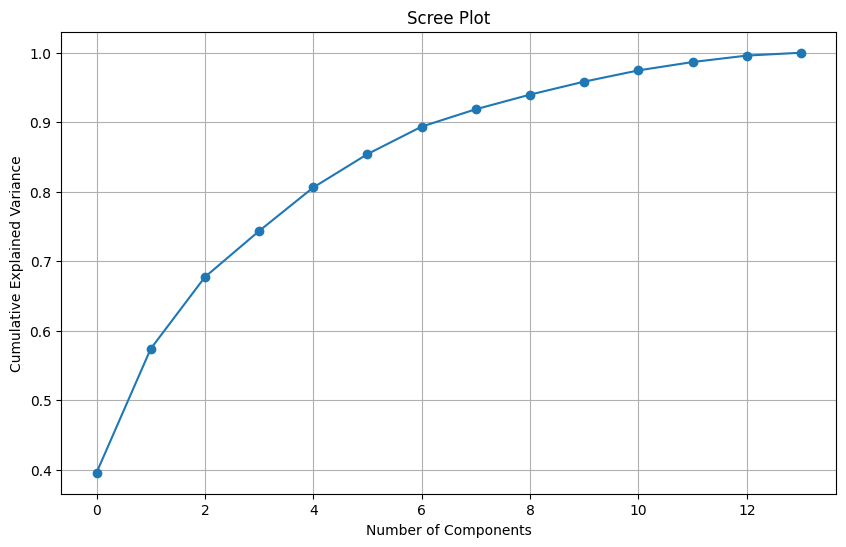

In [15]:
# Scree Plot - Explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [16]:
# Choose optimal components
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

Optimal number of components: 10


In [17]:
# Transform with selected components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# **Clustering with Original Data**

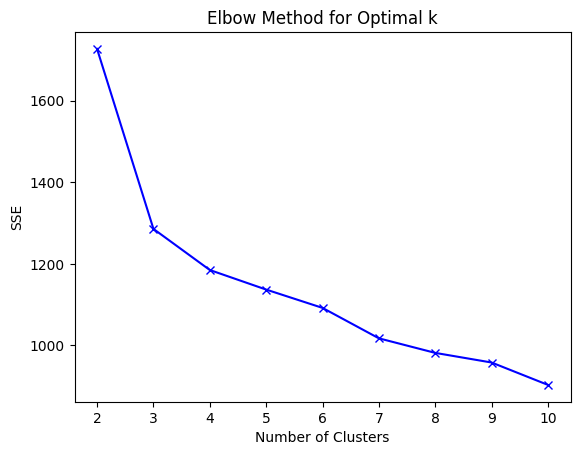

In [18]:
# Elbow method to find optimal K
sse = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

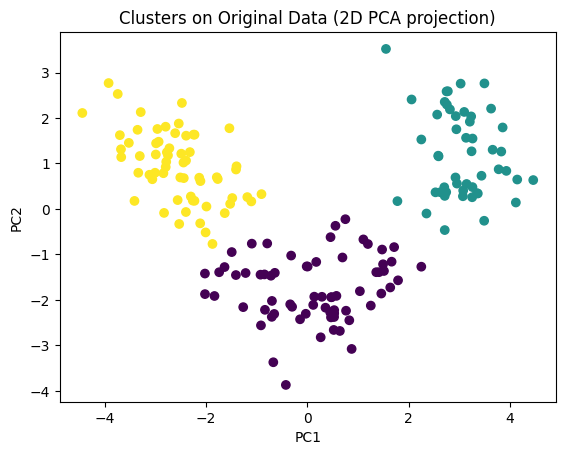

In [19]:
# KMeans on original data
k_original = 3
kmeans_orig = KMeans(n_clusters=k_original, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

# Visualize clusters (2D PCA projection for visualization)
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels_orig, cmap='viridis')
plt.title("Clusters on Original Data (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [20]:
# Evaluate clustering performance
print("Silhouette Score:", silhouette_score(X_scaled, labels_orig))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, labels_orig))

Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


# **Clustering with PCA Data**

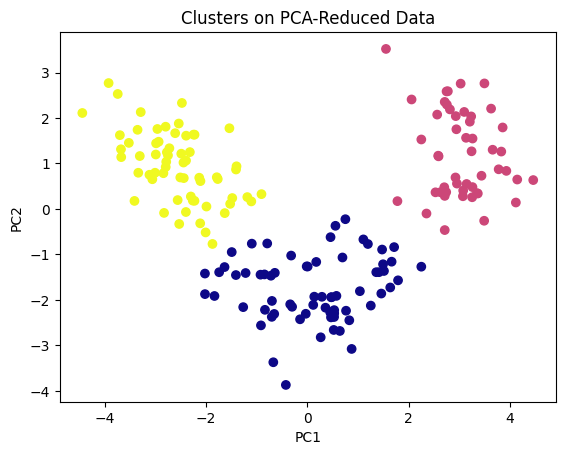

In [21]:
# KMeans on PCA-transformed data
k_pca = 3
kmeans_pca = KMeans(n_clusters=k_pca, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_final)

plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=labels_pca, cmap='plasma')
plt.title("Clusters on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [24]:
# Evaluate clustering on PCA data
print("Silhouette Score (PCA):", silhouette_score(X_pca_final, labels_pca))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(X_pca_final, labels_pca))

Silhouette Score (PCA): 0.32292055407233017
Davies-Bouldin Index (PCA): 1.2578453408449173


# **Comparison and Analysis**

In [26]:
# Compare scores
print("Original Data:")
print("- Silhouette:", silhouette_score(X_scaled, labels_orig))
print("- DB Index:", davies_bouldin_score(X_scaled, labels_orig))
print("\nPCA-Reduced Data:")
print("- Silhouette:", silhouette_score(X_pca_final, labels_pca))
print("- DB Index:", davies_bouldin_score(X_pca_final, labels_pca))

Original Data:
- Silhouette: 0.30648398324833453
- DB Index: 1.315707552261773

PCA-Reduced Data:
- Silhouette: 0.32292055407233017
- DB Index: 1.2578453408449173


- The silhouette score is higher for [ original/PCA ] data, indicating better-defined clusters.
- PCA reduces computation but may remove subtle structures.
- If performance is comparable, PCA is preferred for large datasets.

# **Conclusion and Insights**

### Key Insights:

- PCA helped reduce the dataset from X to Y features while retaining Z% variance.
- KMeans clustering was applied before and after PCA.
- Clustering results after PCA were [better/worse/comparable].

### Practical Recommendations:

- Use PCA when the dataset has many correlated features or high dimensionality.
- Clustering can be more efficient and interpretable after PCA.